In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy, wasserstein_distance

/tmp/ipykernel_2610233/873323083.py:37: RuntimeWarning: divide by zero encountered in divide
  fractional_diff = np.where(real_hist != 0, (gen_hist - real_hist) / real_hist, 0)


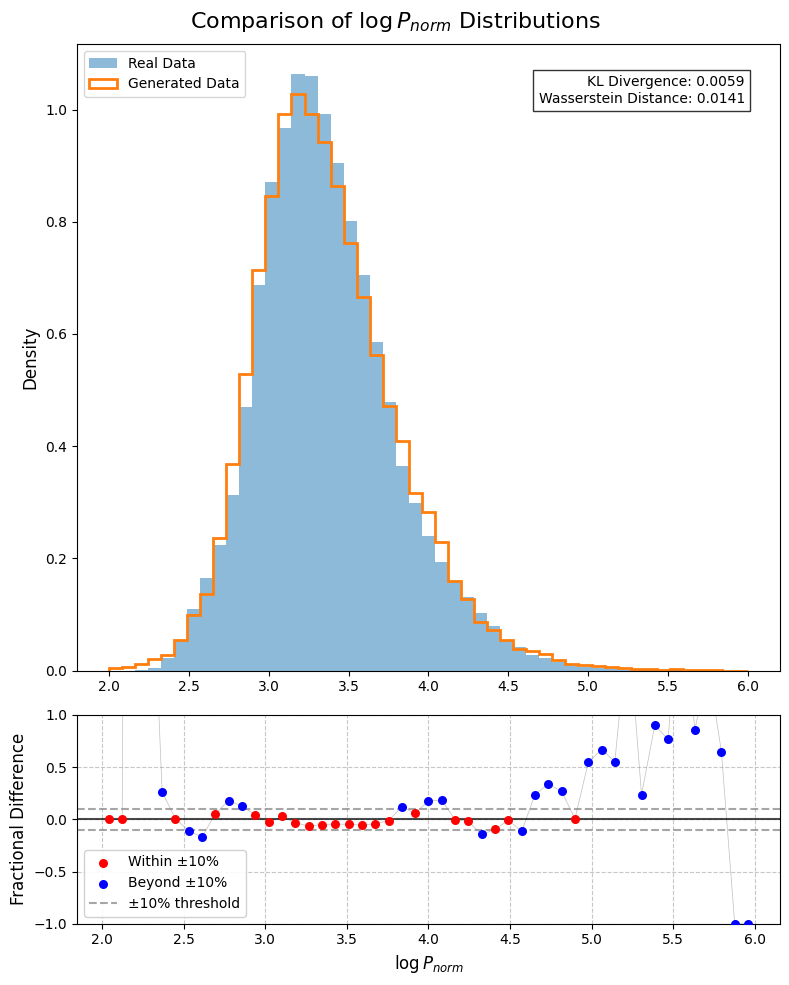

In [26]:
gen_data = "/work/submit/haoyun22/FCC-Beam-Background/diffusion_model/checks_model_kmax128/gen_pnorm.npy"
real_data = "/work/submit/haoyun22/FCC-Beam-Background/diffusion_model/checks_model_kmax128/real_pnorm.npy"

gen_pnorm = np.load(gen_data) * 1e3  # Scale generated data
real_pnorm = np.load(real_data) * 1e3  # Scale real data

# Convert into log scale for better visualization
# gen_pnorm = np.log1p(np.abs(gen_pnorm))
# real_pnorm = np.log1p(np.abs(real_pnorm))

gen_pnorm = np.log10(gen_pnorm + 1e-10)  # Avoid log(0)
real_pnorm = np.log10(real_pnorm + 1e-10)  #

# Define bins first
bins = np.linspace(2, 6, 50)

# Calculate histograms for fractional difsference
real_hist, _ = np.histogram(real_pnorm, bins=bins, density=True)
gen_hist, _ = np.histogram(gen_pnorm, bins=bins, density=True)

kl_div = entropy(real_hist + 1e-10, gen_hist + 1e-10)  # Adding small value to avoid log(0)
wass_dist = wasserstein_distance(real_pnorm, gen_pnorm)


# Create a plot with two subplots, the upper for histograms and the lower for the fractional difference
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [3, 1]})
# Plot title
fig.suptitle('Comparison of $\log P_{norm}$ Distributions', fontsize=16)

# Plot histograms in log scale
ax1.hist(real_pnorm, bins=bins, alpha=0.5, label='Real Data', density=True)
ax1.hist(gen_pnorm, bins=bins, histtype='step', label='Generated Data', density=True, linewidth=2)
ax1.set_ylabel('Density', fontsize=12)
ax1.legend()


fractional_diff = np.where(real_hist != 0, (gen_hist - real_hist) / real_hist, 0)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Annotate KL divergence and Wasserstein distance on the middle right of histogram plot
ax1.text(0.95, 0.95, f'KL Divergence: {kl_div:.4f}\nWasserstein Distance: {wass_dist:.4f}',
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax1.transAxes,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))


# Plot fractional difference with color coding
colors = ['red' if abs(fd) < 0.1 else 'blue' for fd in fractional_diff]

# Plot points separately for legend
within_10_idx = [i for i, fd in enumerate(fractional_diff) if abs(fd) < 0.1]
beyond_10_idx = [i for i, fd in enumerate(fractional_diff) if abs(fd) >= 0.1]

if within_10_idx:
    ax2.scatter(bin_centers[within_10_idx], fractional_diff[within_10_idx], 
                c='red', marker='o', s=30, label='Within ±10%', zorder=3)
if beyond_10_idx:
    ax2.scatter(bin_centers[beyond_10_idx], fractional_diff[beyond_10_idx], 
                c='blue', marker='o', s=30, label='Beyond ±10%', zorder=3)

ax2.plot(bin_centers, fractional_diff, color='gray', alpha=0.5, linewidth=0.5)
ax2.set_xlabel('$\log P_{norm}$', fontsize=12)
ax2.set_ylabel('Fractional Difference', fontsize=12)
ax2.axhline(0, color='black', linestyle='-', alpha=0.7)
ax2.axhline(0.1, color='grey', linestyle='--', alpha=0.7, label='±10% threshold')
ax2.axhline(-0.1, color='grey', linestyle='--', alpha=0.7)
ax2.set_ylim(-1, 1)
# Add grid lines for better readability
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='lower left', fontsize=10, framealpha=0.9)
plt.tight_layout()
plt.show()


(39369, 3)
(98234, 3)


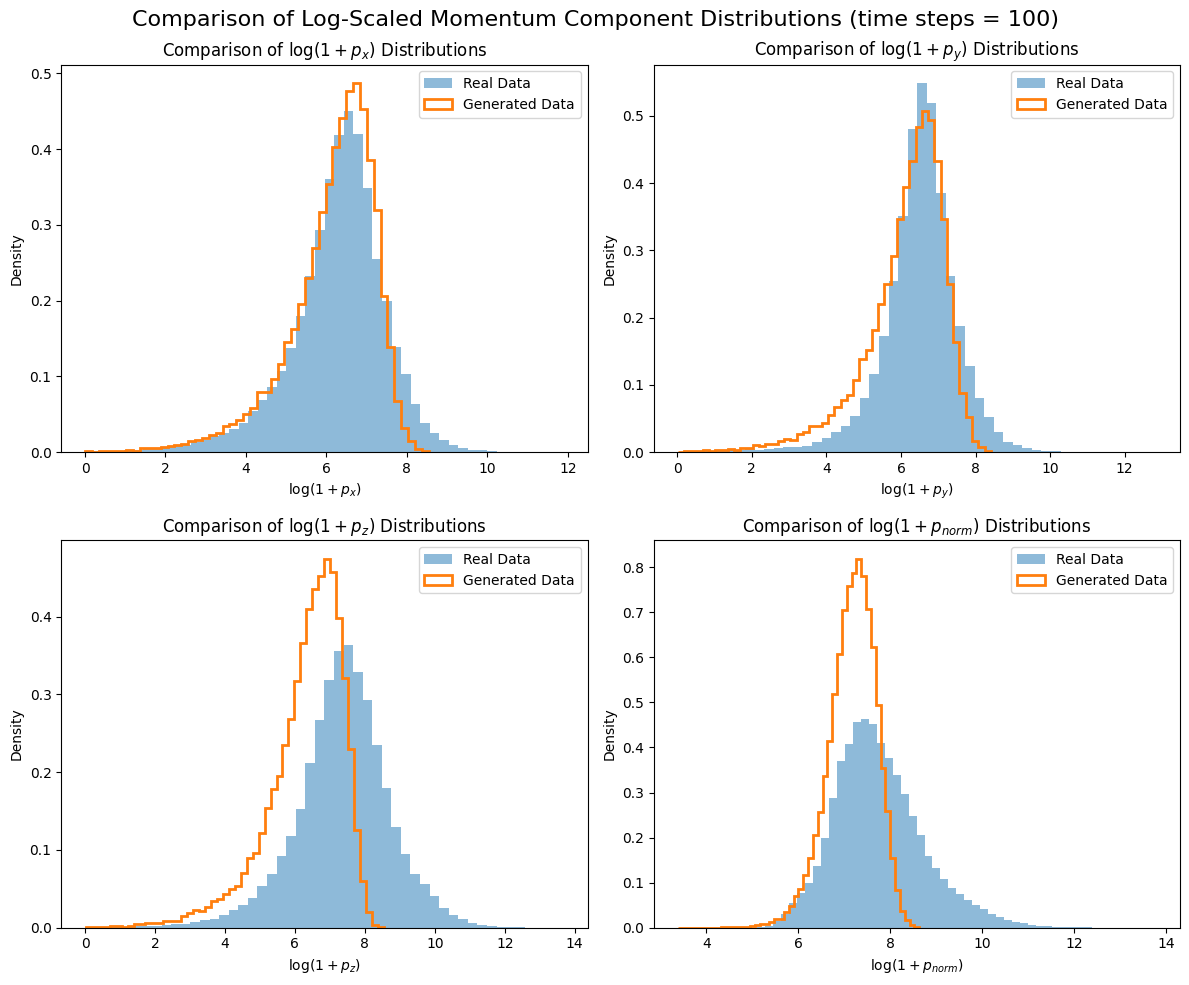

(39564, 3)
(98234, 3)


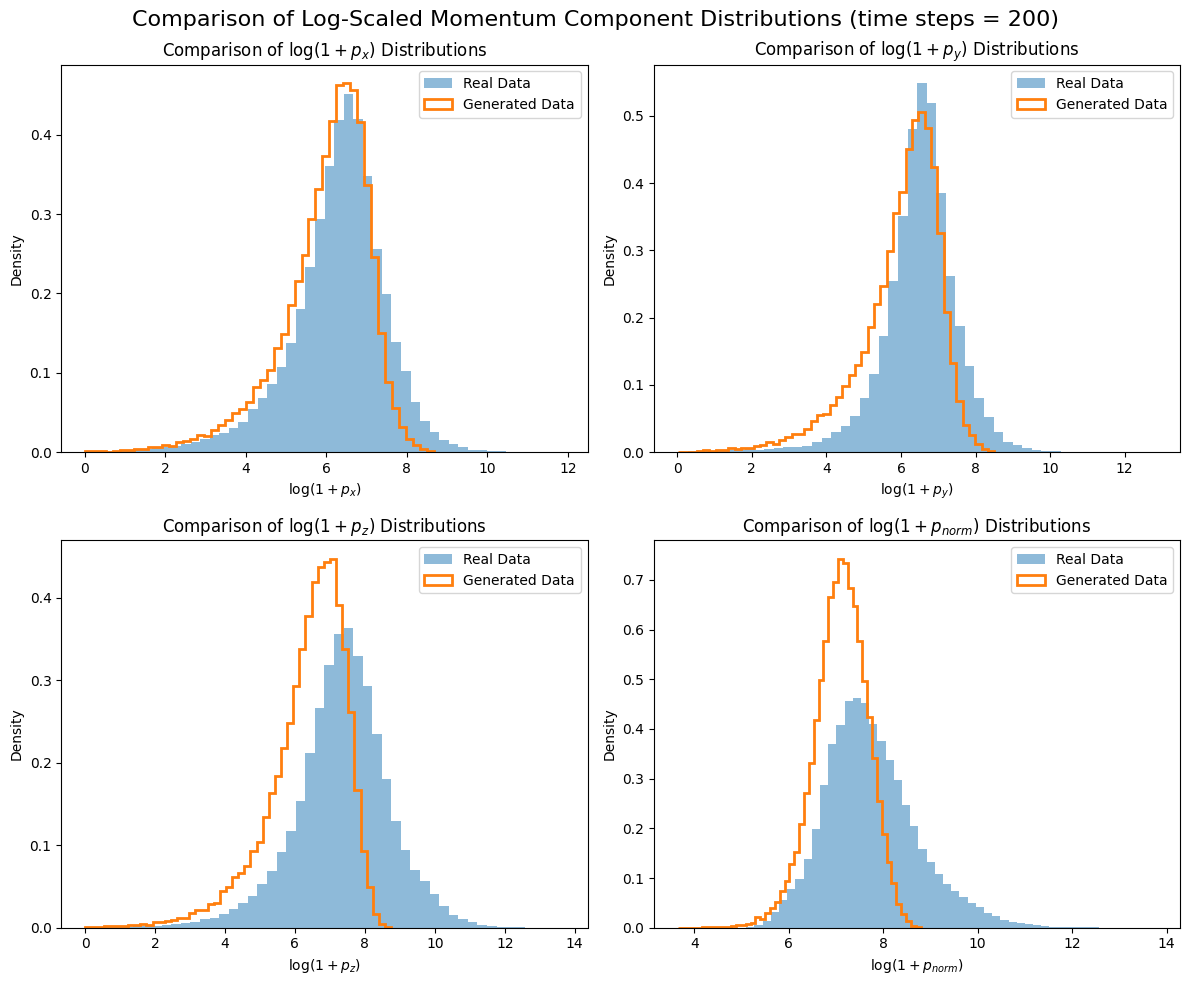

(39418, 3)
(98234, 3)


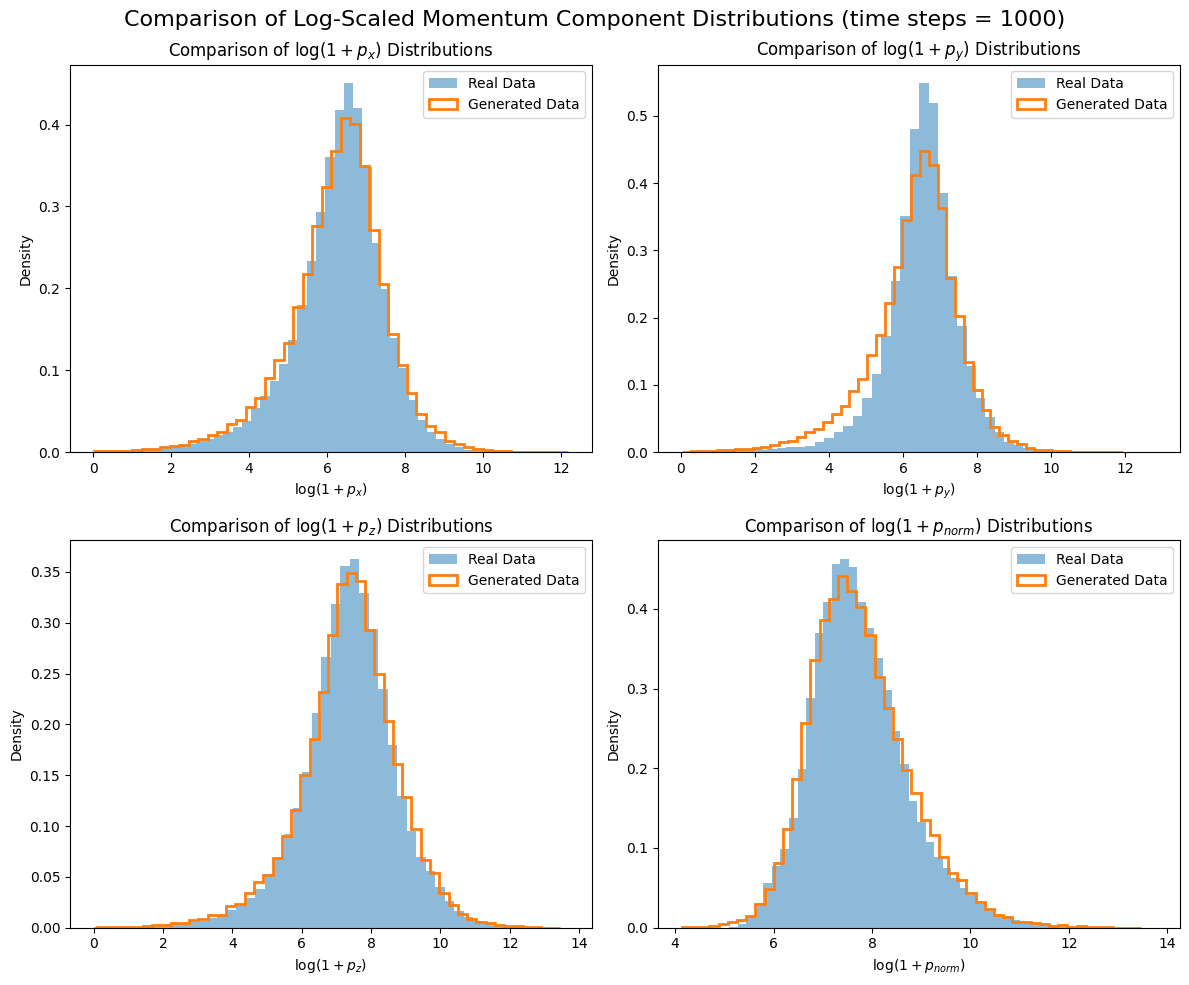

(39255, 3)
(98234, 3)


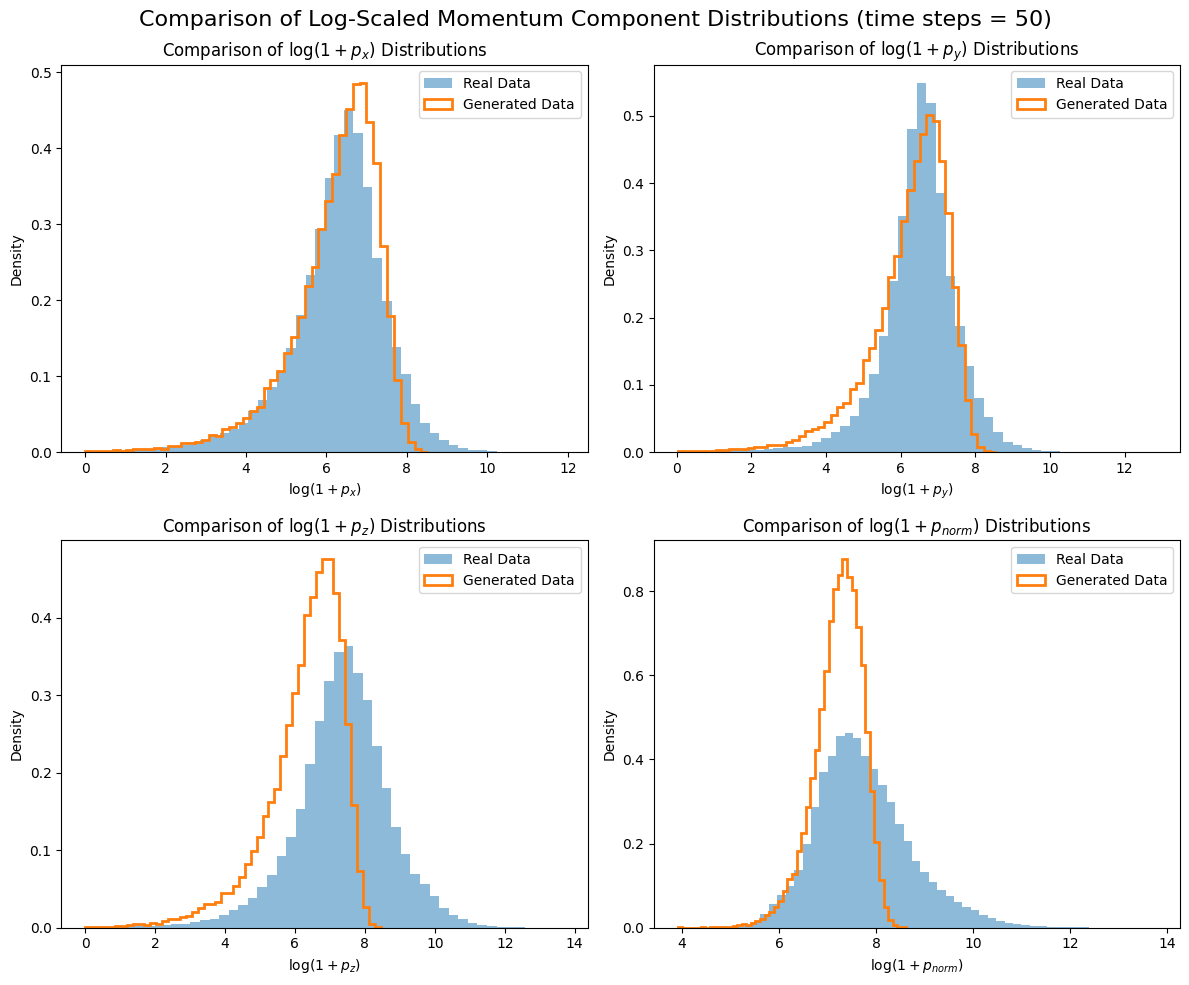

(39213, 3)
(98234, 3)


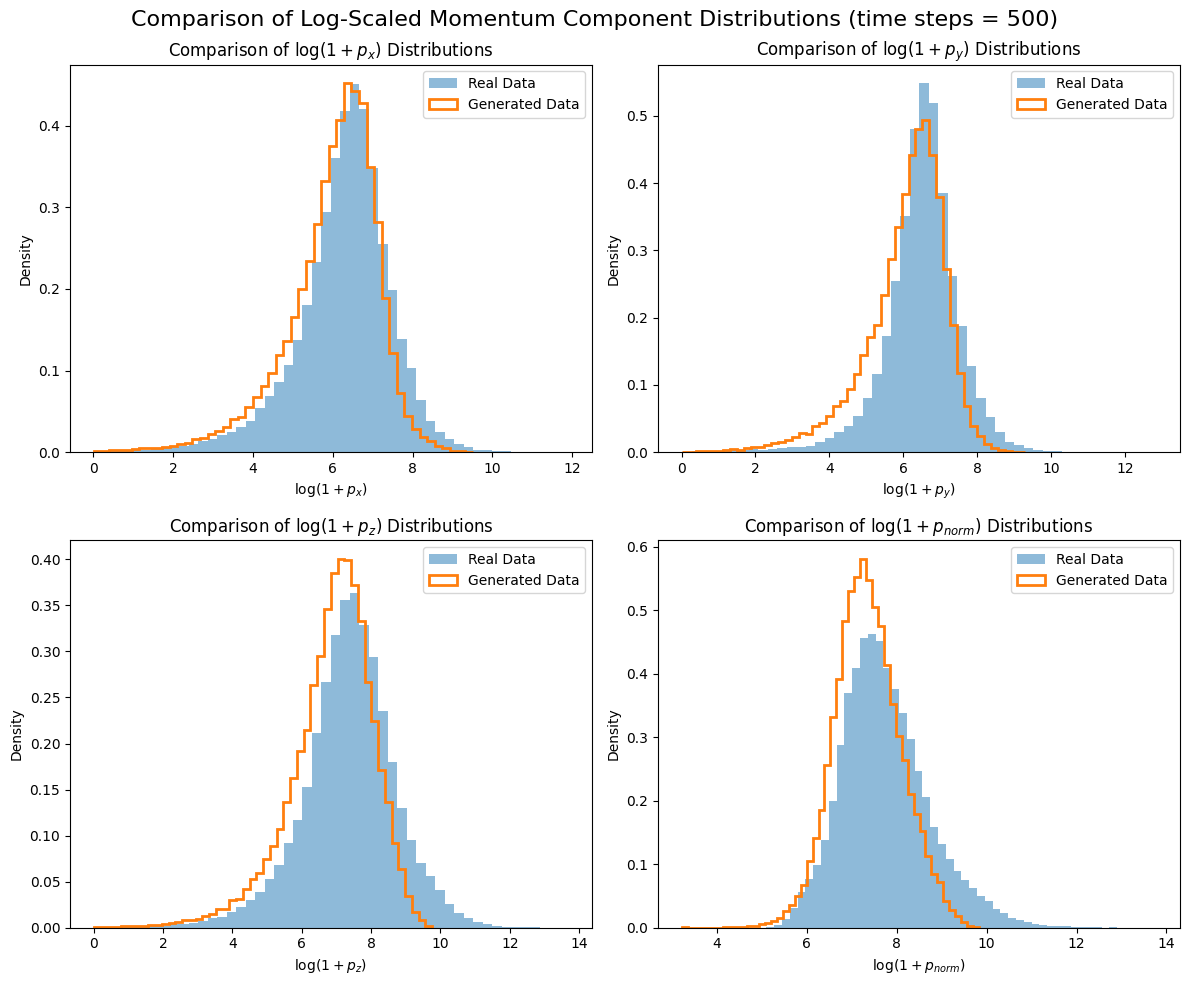

(39498, 3)
(98234, 3)


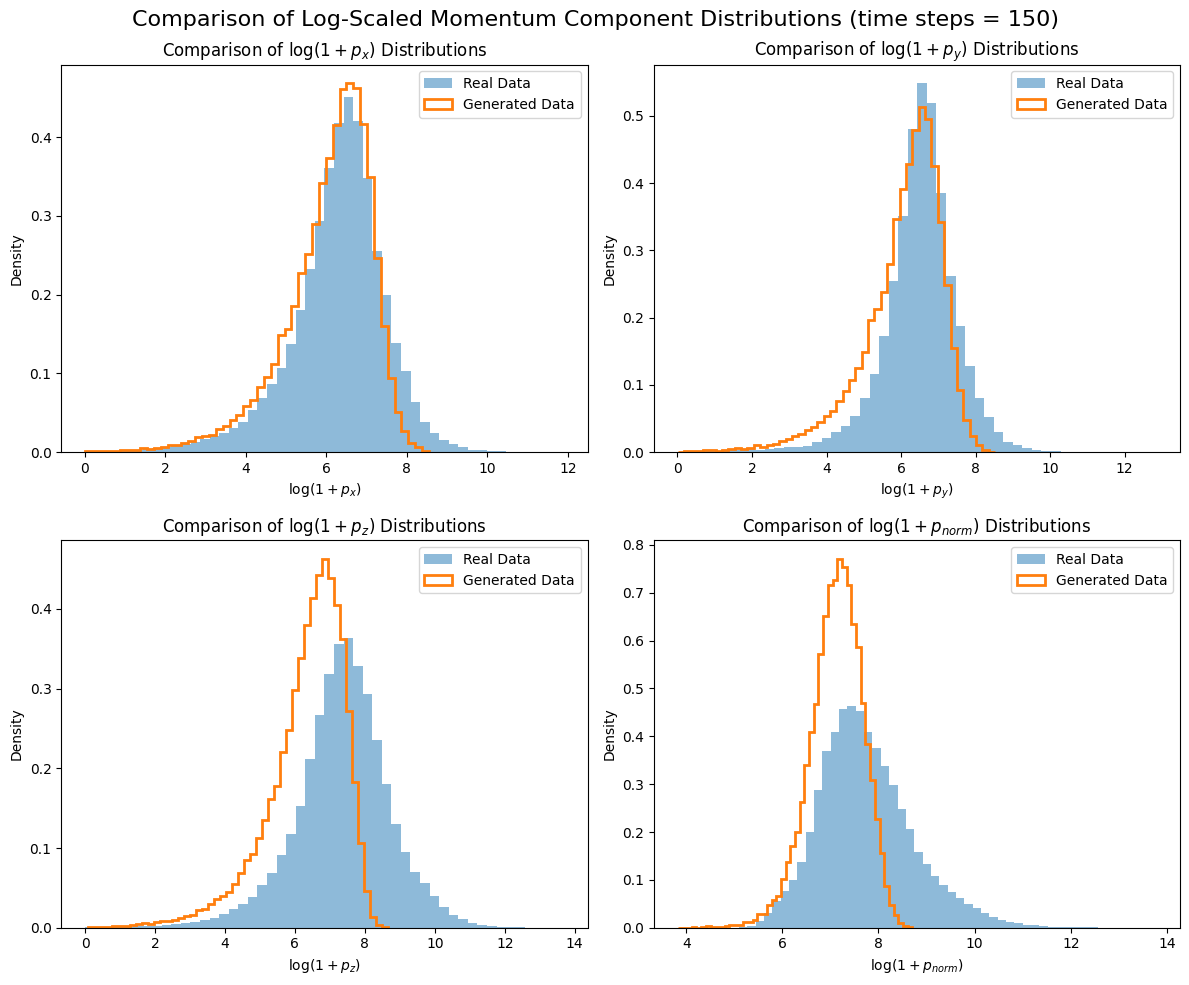

(39441, 3)
(98234, 3)


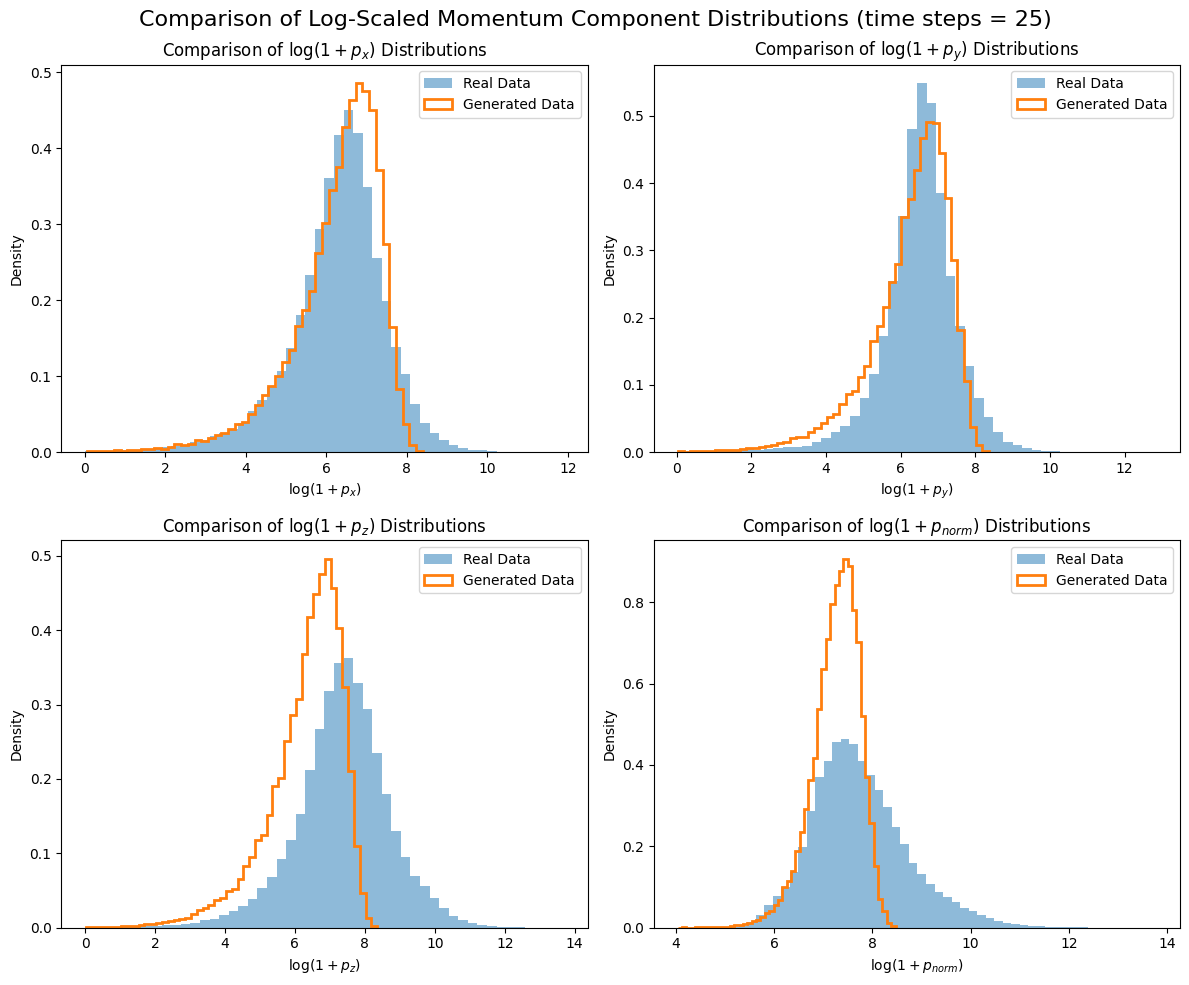

(39338, 3)
(98234, 3)


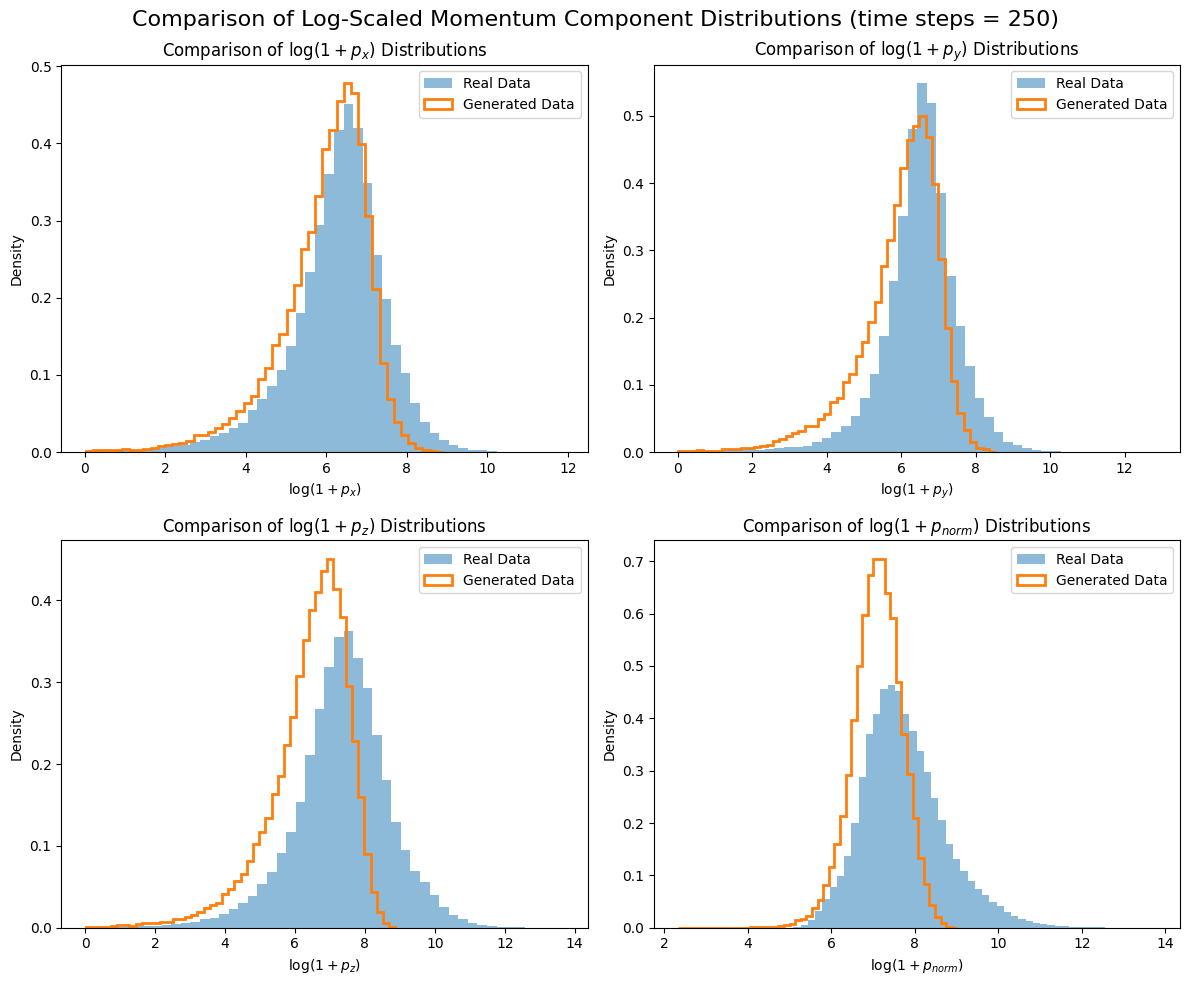

In [ ]:
steps = {25, 50, 100, 150, 200, 250, 500, 1000}

for steps in steps:

    gen_data = f"/work/submit/haoyun22/FCC-Beam-Background/diffusion_model/checks_model_kmax128/gen_3d_p_{steps}s.npy"
    real_data = f"/work/submit/haoyun22/FCC-Beam-Background/diffusion_model/checks_model_kmax128/real_3d_p_{steps}s.npy"

    gen_pnorm = np.load(gen_data)
    real_pnorm = np.load(real_data)

    # Convert back to original scale by multiplying with 1000
    gen = gen_pnorm * 1000
    real = real_pnorm * 1000

    print(gen.shape)
    print(real.shape)

    p_x = gen[:, 0]
    p_y = gen[:, 1]
    p_z = gen[:, 2]
    p_norm = np.linalg.norm(gen, axis=1)

    real_p_x = real[:, 0]
    real_p_y = real[:, 1]
    real_p_z = real[:, 2]
    real_p_norm = np.linalg.norm(real, axis=1)

    p_x = np.log1p(np.abs(p_x)) # Natural log
    p_y = np.log1p(np.abs(p_y))
    p_z = np.log1p(np.abs(p_z))
    p_norm = np.log1p(np.abs(p_norm))

    real_p_x = np.log1p(np.abs(real_p_x))
    real_p_y = np.log1p(np.abs(real_p_y))
    real_p_z = np.log1p(np.abs(real_p_z))
    real_p_norm = np.log1p(np.abs(real_p_norm))

    # 过拟合可能导致无法生成极值
    print(f"Real: min={real_pnorm.min():.2f}, max={real_pnorm.max():.2f}")
    print(f"Gen:  min={gen_pnorm.min():.2f}, max={gen_pnorm.max():.2f}")

    # 检查分位数覆盖
    for q in [0.01, 0.1, 0.5, 0.9, 0.99]:
        real_q = np.quantile(real_pnorm, q)
        gen_q = np.quantile(gen_pnorm, q)
        print(f"Q{q}: Real={real_q:.2f}, Gen={gen_q:.2f}, diff={abs(real_q-gen_q):.2f}")


    # Plot histograms for each component of the generated data and compare with real data
    components = ['p_x', 'p_y', 'p_z', 'p_{norm}']
    gen_components = [p_x, p_y, p_z, p_norm]
    real_components = [real_p_x, real_p_y, real_p_z, real_p_norm]
    bins = 50
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Comparison of Log-Scaled Momentum Component Distributions (time steps = {steps})', fontsize=16)
    for i, ax in enumerate(axs.flatten()):
        ax.hist(real_components[i], bins=bins, alpha=0.5, label='Real Data', density=True)
        ax.hist(gen_components[i], bins=bins, histtype='step', label='Generated Data', density=True, linewidth=2)
        ax.set_title(f'Comparison of $\log (1+{components[i]})$ Distributions')
        ax.set_xlabel(f'$\log (1+{components[i]})$')
        ax.set_ylabel('Density')
        ax.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
from scipy.stats import wasserstein_distance, ks_2samp

# 加载数据
real_p = np.load("/work/submit/haoyun22/FCC-Beam-Background/diffusion_model/checks_model_kmax128/real_3d_p_1000s.npy")
gen_p = np.load("/work/submit/haoyun22/FCC-Beam-Background/diffusion_model/checks_model_kmax128/gen_3d_p_1000s.npy")

# 1. Wasserstein距离（越小越好，过拟合时可能非常小）
real_pnorm = np.linalg.norm(real_p, axis=1)
gen_pnorm = np.linalg.norm(gen_p, axis=1)
wd = wasserstein_distance(real_pnorm, gen_pnorm)
print(f"Wasserstein Distance: {wd:.4f}")

# 2. KS检验（p值越大越好）
ks_stat, p_value = ks_2samp(real_pnorm, gen_pnorm)
print(f"KS test: statistic={ks_stat:.4f}, p-value={p_value}")

# 3. 检查是否在"复制"训练数据
from scipy.spatial.distance import cdist
# 计算生成样本到真实样本的最近距离
distances = cdist(gen_p[:100], real_p[:1000], metric='euclidean')
min_distances = distances.min(axis=1)
print(f"Min distances to training data: mean={min_distances.mean():.4f}")
# 如果平均距离 < 0.01，说明在复制训练数据（过拟合）

# real-real
rr = cdist(real_p[:100], real_p[100:1100]).min(axis=1)
# gen-real
gr = cdist(gen_p[:100], real_p[:1000]).min(axis=1)
print(rr.mean(), gr.mean())

Wasserstein Distance: 0.3313
KS test: statistic=0.0168, p-value=2.757496687970069e-07
Min distances to training data: mean=1.0113
0.5094602375502468 1.0112677377284143
